In [1]:
#import libraries
import requests
import pandas as pd
import time
import psycopg2 as ps
from dotenv import load_dotenv
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
load_dotenv()

True

In [3]:
#connect to db
def connect_to_db(host_name, dbname, port, username, password):
    try:
        conn = ps.connect(host=host_name, database=dbname, user=username, password=password, port=port)
    except ps.OperationalError as e:
            raise e
    else:
        print('Connected!')
    return conn

In [4]:
host_name = os.getenv('host_name')
dbname = os.getenv('dbname')
port = os.getenv('port')
username = os.getenv('un')
password = os.getenv('password')
conn = None

conn = connect_to_db(host_name, dbname, port, username, password)

Connected!


In [5]:
query = """
SELECT * FROM videos;
"""
df = pd.read_sql_query(query, conn)


C:\Users\Levin\AppData\Local\Temp\ipykernel_12296\2999886667.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [6]:
conn.close()

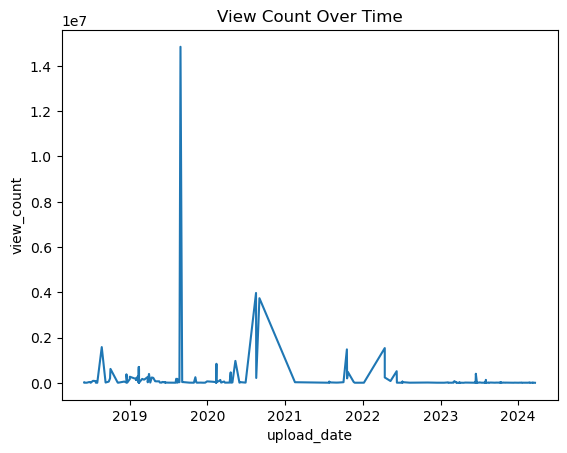

In [7]:
df.set_index('upload_date', inplace=True)
df['view_count'].plot()

plt.title('View Count Over Time')
plt.xlabel('upload_date')
plt.ylabel('view_count')
plt.show()

In [9]:
print(df.columns)


Index(['video_id', 'video_title', 'view_count', 'like_count', 'dislike_count',
       'comment_count'],
      dtype='object')


In [11]:
df.set_index('upload_date', inplace=True)
df['like_count'].plot()

plt.title('Like Count Over Time')
plt.xlabel('upload_date')
plt.ylabel('like_count')
plt.show()

KeyError: "None of ['upload_date'] are in the columns"